In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Histograms
Image histogram provides a plot for intensity distribution of an image, with pixel values (0-255) on x-axis, and corresponding number of pixels on y-axis.

### Finding histogram of an image
Function: <b>cv2.calcHist(images, channels, mask, histSize, ranges)</b>
1. <b>images</b> - source image (datatype - uint8 or float32)
2. <b>channels</b> - Channel for which histogram needs to be calculated
3. <b>mask</b> - For finding histogram for a region of image, we have to create a mask. Otherwise "None".
4. <b>histSize</b> - Count of intervals for finding pixel values.
5. <b>ranges</b> - Range of intensity values to be measured.

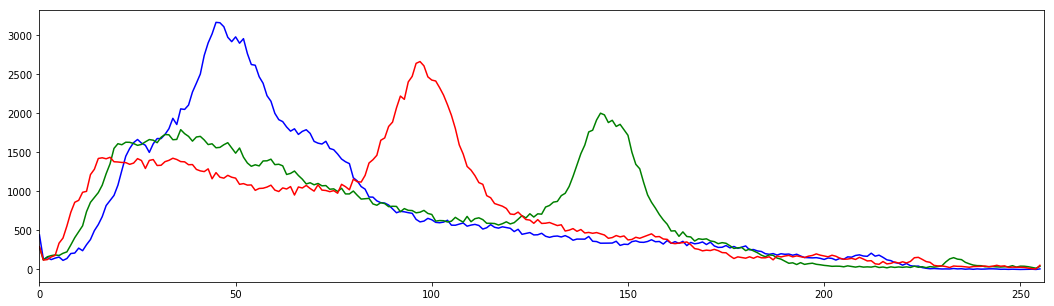

In [2]:
image = cv2.imread('../resources/messi.jpg')

colors = ['blue', 'green', 'red']

fig = plt.figure()
fig.set_size_inches(18, 5)

for i in range(len(colors)):
    histogram = cv2.calcHist([image], [i], None, [256], [0,256])
    fig.add_subplot(1, 1, 1)
    plt.plot(histogram, color=colors[i])
    plt.xlim([0, 256])

plt.show()

### Histogram Equalisation
Application - Enhancing contrast of an image

Function: <b>cv2.equalizeHist(image)</b>

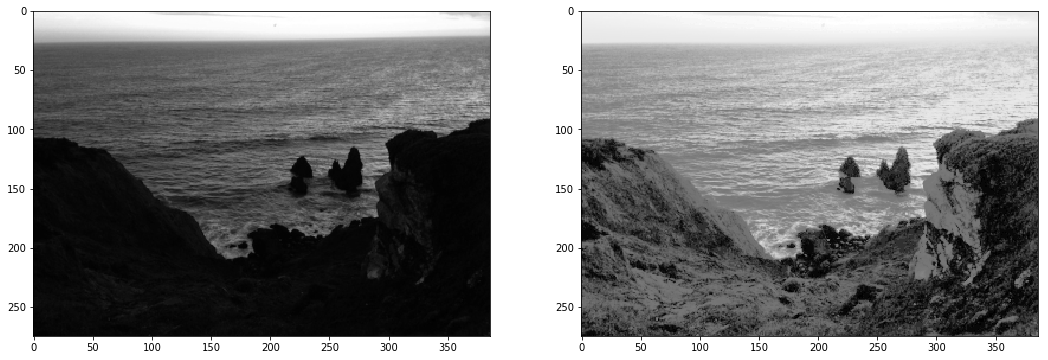

In [3]:
# Contrasting grayscale image
gray_scene = cv2.imread('../resources/scene_gray.png', cv2.IMREAD_GRAYSCALE)
histogram = cv2.equalizeHist(gray_scene)

fig = plt.figure()
fig.set_size_inches(18, 10)

fig.add_subplot(1, 2, 1)
plt.imshow(gray_scene, cmap='gray')

fig.add_subplot(1, 2, 2)
plt.imshow(histogram, cmap='gray')

plt.show()

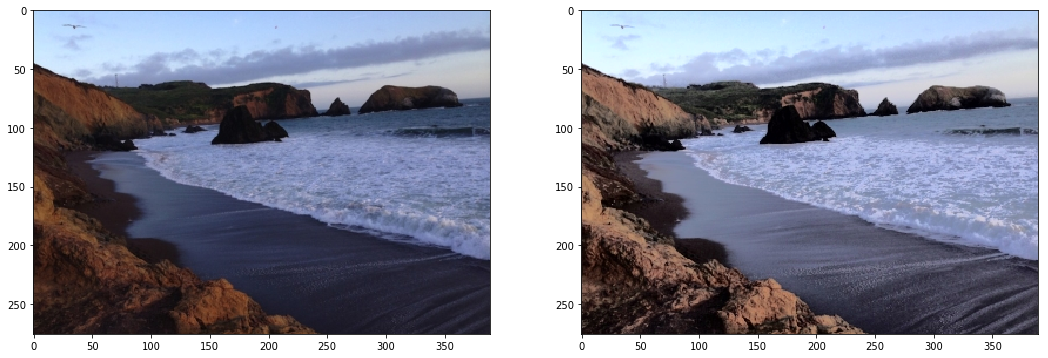

In [4]:
# Contrasting color image
# Concept of histogram equalization is applicable to intensity values only.
# So we convert BGR to YUV colorspace, separating color information from intensity.
scene = cv2.imread('../resources/scene.png')
yuv_scene = cv2.cvtColor(scene, cv2.COLOR_BGR2YUV)

y_channel = yuv_scene[:, :, 0]
y_channel_equalized = cv2.equalizeHist(y_channel)
yuv_scene[:, :, 0] = y_channel_equalized

contrasted_scene = cv2.cvtColor(yuv_scene, cv2.COLOR_YUV2BGR)

fig = plt.figure()
fig.set_size_inches(18, 10)

fig.add_subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(scene, cv2.COLOR_BGR2RGB))

fig.add_subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(contrasted_scene, cv2.COLOR_BGR2RGB))

plt.show()

### CLAHE (Contrast Limited Adaptive Histogram Equalization)
Equalizing the historgram across whole image might not be useful sometimes. Small objects in the image might lose information, due to over or under contrasting. In this case, adaptive histogram equalization is used.

In CLAHE, image is divided into small blocks (8x8 by default), and these blocks are histogram equalized rather than whole image once.

To avoid amplification of noise, contrast limit (40 by default) is applied. If any histogram bin is above contrast limit, it is clipped and distributed among other bins, and then histogram is equalized.

Tile boundary pixels, corner pixels and edge pixels might be transformed more than one time, thus giving multiple values for the same pixel. For simplicity and computational efficiency, certain interpolation methods are used to calculate the pixel value from the multiple obtained values.

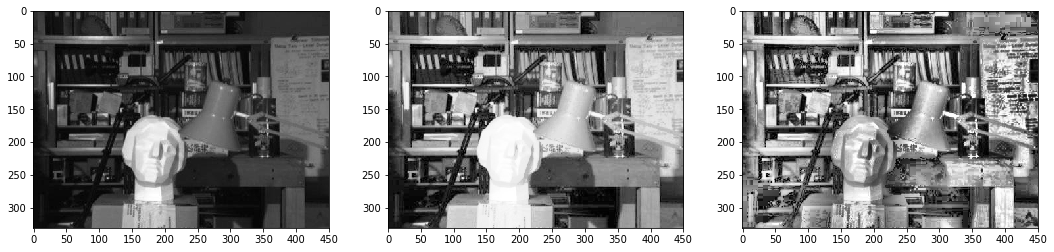

In [5]:
statue = cv2.imread('../resources/statue.jpg', cv2.IMREAD_GRAYSCALE)

normal_equalized_hist = cv2.equalizeHist(statue)

clahe = cv2.createCLAHE()
clahe_equalized_hist = clahe.apply(statue)

fig = plt.figure()
fig.set_size_inches(18, 10)

fig.add_subplot(1, 3, 1)
plt.imshow(statue, cmap='gray')

fig.add_subplot(1, 3, 2)
plt.imshow(normal_equalized_hist, cmap='gray')

fig.add_subplot(1, 3, 3)
plt.imshow(clahe_equalized_hist, cmap='gray')

plt.show()

### Histogram Backprojection Example
We'll be finding the football in the picture below.
<img src="../resources/messi.jpg">
Our goal is to create an output image where each pixel corresponds to probability of pixel belonging to the object.

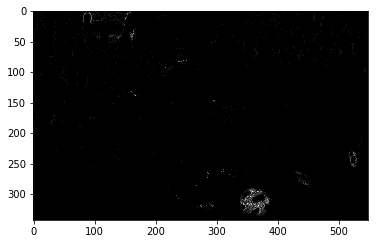

In [6]:
target = image
hsv_target = cv2.cvtColor(target, cv2.COLOR_BGR2HSV)

football = target[290:335, 338:387]
hsv_obj = cv2.cvtColor(football, cv2.COLOR_BGR2HSV)

obj_hist = cv2.calcHist([hsv_obj], [0, 1], None, [40, 256], [0, 40, 0 ,256])

cv2.normalize(obj_hist, obj_hist, 0, 255, cv2.NORM_MINMAX)
result = cv2.calcBackProject([hsv_target], [0, 1], obj_hist, [0, 40, 0, 256], 1)

plt.imshow(result, cmap='gray')
plt.show()